# Airline Passenger Prediction

How can we predict the number of airline passengers for future months, considering that historical data exhibits recurring (periodic) patterns depending on the months of the year, which influence the predictions?

Why periodic patterns?
- Certain times of the year, such as summer holidays or winter vacations, see a surge in passenger numbers as people travel for leisure or to visit family.

Train RMSE: 19.37
Test RMSE: 37.09


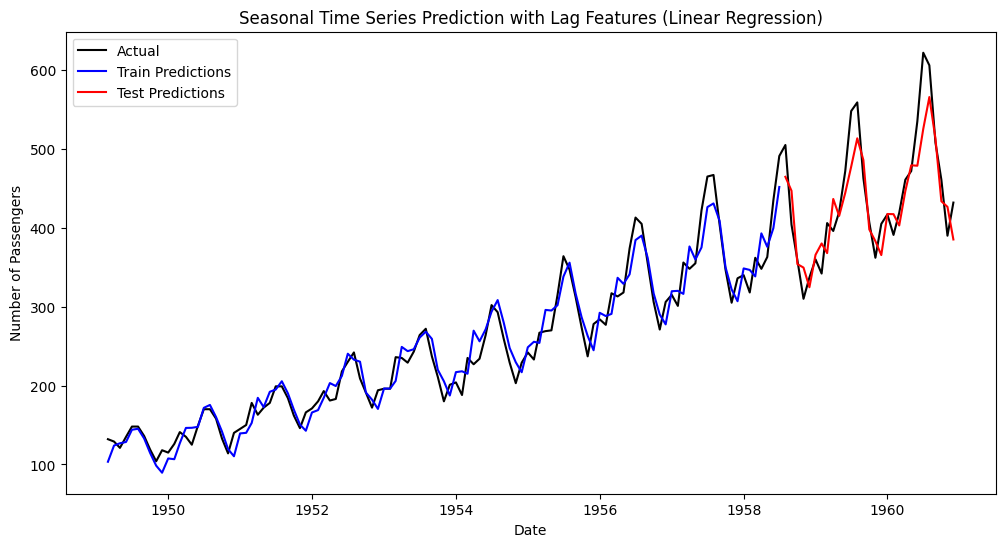

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data['t'] = range(1, len(data) + 1)  

data['Passengers_t-1'] = data['Passengers'].shift(1)
data['Passengers_t-2'] = data['Passengers'].shift(2)

data['sin_month'] = np.sin(2 * np.pi * data['t'] / 12)
data['cos_month'] = np.cos(2 * np.pi * data['t'] / 12)

data.dropna(inplace=True)

features = ['t', 'Passengers_t-1', 'Passengers_t-2', 'sin_month', 'cos_month']
X = data[features]
y = data['Passengers']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, y, label='Actual', color='black')
plt.plot(X_train.index, y_train_pred, label='Train Predictions', color='blue')
plt.plot(X_test.index, y_test_pred, label='Test Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Seasonal Time Series Prediction with Lag Features (Linear Regression)')
plt.legend()
plt.show()
